## **Fast AI Experements Based on [this](https://towardsdatascience.com/transfer-learning-using-the-fastai-library-d686b238213e) blog**

trained models in this [google Drive Folder](https://drive.google.com/open?id=1bW0UjVudEarP5qTToxwDtcIKXX9iuM9L)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

# get models from drive

In [2]:
#DATASET
# !unzip drive/My\ Drive/ammi-2020-convnets.zip 

# #PSUDO DATASET
# # # # !unzip drive/My\ Drive/data/random.zip -d here

# # GET SAVED MODELS HERE
# !mkdir models/
# !cp -r drive/My\ Drive/data/models/* models/.

# PUSH TRAINED MODELS TO GOOGLE DRIVE
# !cp -r models/* drive/My\ Drive/data/models/.


In [3]:
# !pip install pretrainedmodels
# !pip uninstall torch torchvision -y 
# !pip install torch==1.4.0 torchvision==0.5.0 

# Importing Fast AI library

In [1]:
import os 
import pretrainedmodels
from tqdm import tqdm

In [2]:
from fastai import *
from fastai.vision import *

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

from math import floor

# Looking at the data

In [3]:
# train_path = "./train/train"
# test_path = "./test/test/0"

data_path = "./data/train/train"
test_path = "./data/test/test"
extraimage_path = "./data/extraimages/extraimages"

# !ls

In [4]:
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)

In [5]:
# get_labels("./train/train/cgm/train-cgm-528.jpg")

In [6]:
from glob import glob
imagePatches = glob("./data/train/train/*/*.*", recursive=True)
test_imagePatches = glob("./data/extraimages/extraimages/*.*", recursive=True)
imagePatches[0:10]

['./data/train/train/cmd/train-cmd-634.jpg',
 './data/train/train/cmd/train-cmd-1039.jpg',
 './data/train/train/cmd/train-cmd-2023.jpg',
 './data/train/train/cmd/train-cmd-73.jpg',
 './data/train/train/cmd/train-cmd-1933.jpg',
 './data/train/train/cmd/train-cmd-449.jpg',
 './data/train/train/cmd/train-cmd-2276.jpg',
 './data/train/train/cmd/train-cmd-1450.jpg',
 './data/train/train/cmd/train-cmd-674.jpg',
 './data/train/train/cmd/train-cmd-1204.jpg']

In [7]:
path=""

transform_kwargs = {"do_flip": True,
                    "flip_vert": True,
                    "max_rotate": 180,
                    "max_zoom": 1.1,
                    "max_lighting": 0.2,
                    "max_warp": 0.2,
                    "p_affine": 0.75,
                    "p_lighting": 0.7}

tfms = get_transforms(**transform_kwargs)


In [8]:
data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=448, 
                                     bs=16,num_workers=2,ds_tfms=tfms,valid_pct=0.0
                                  ).normalize(imagenet_stats)

(ImageDataBunch;
 
 Train: LabelList (5656 items)
 x: ImageList
 Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
 y: CategoryList
 cmd,cmd,cmd,cmd,cmd
 Path: .;
 
 Valid: LabelList (0 items)
 x: ImageList
 
 y: CategoryList
 
 Path: .;
 
 Test: None, 5656)

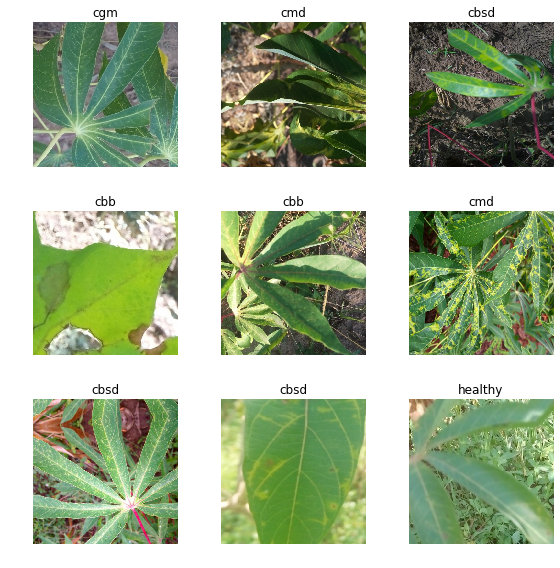

In [9]:
data.show_batch(rows=3, figsize=(8,8))
data,4525+1131

# Transfer learning using a pre-trained model: ResNet 50

In [12]:
model_name = 'se_resnext101_32x4d_2'


In [10]:
model_name = 'se_resnext101_32x4d_2'
def get_cadene_model(pretrained=True, model_name='se_resnext101_32x4d'):
    if pretrained:
        arch = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
    else:
        arch = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained=None)
    return arch

learn = cnn_learner(data, get_cadene_model, metrics=[error_rate,accuracy])

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


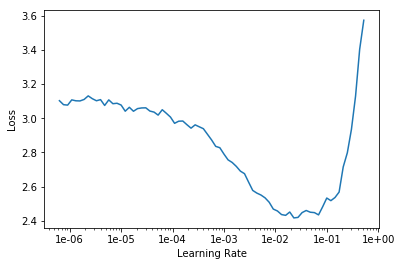

In [11]:
learn.lr_find()
learn.recorder.plot()

In [13]:
# learn.apply_dropout(0.2)
learn.fit_one_cycle(15)

In [15]:
# learn.apply_dropout(0.2)
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.190116,0.832851,0.250221,0.749779,02:04
1,1.050817,0.697112,0.212202,0.787798,02:01
2,0.843685,0.590857,0.191866,0.808134,02:02
3,0.749428,0.606672,0.207781,0.792219,02:02
4,0.685327,0.466215,0.160035,0.839965,02:02
5,0.634787,0.445014,0.152962,0.847038,02:02
6,0.650900,0.438369,0.143236,0.856764,02:02
7,0.599442,0.458937,0.152962,0.847038,02:02
8,0.507053,0.421986,0.133510,0.866490,02:02
9,0.525150,0.456812,0.148541,0.851459,02:02


In [14]:
learn.save(model_name)